# Titanic survival Challeng

# Problem Statement
Predict surviving passenger on the Titanic 

# 1) Importing key libraries

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns
sns.set()
import missingno
plt.style.use('seaborn-whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [3]:
# For neural network
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


# 2) Getting Data

In [4]:
# Import train & test data 
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')

In [5]:
train = train.drop('Unnamed: 0', axis=1)
test= test.drop('Unnamed: 0', axis=1)

In [6]:
# We do not need PassengerID for trainset
train = train.drop("PassengerId", axis=1)

In [7]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [8]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,0.0
1,893,3,1,3.0,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0.0,2.0,0,0,0.0
4,896,3,1,1.0,0.0,2.0,0,2,0.8


## 3) Checking missing values

In [9]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [10]:
missing_values = find_missing_values(train, columns=train.columns)
missing_values

Number of missing or NaN values for each column:


{'Survived': 0,
 'Pclass': 0,
 'Sex': 0,
 'Age': 0,
 'Fare': 0,
 'Cabin': 0,
 'Embarked': 0,
 'Title': 0,
 'FamilySize': 0}

In [11]:
missing_values = find_missing_values(test, columns=test.columns)
missing_values

Number of missing or NaN values for each column:


{'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'Age': 0,
 'Fare': 0,
 'Cabin': 0,
 'Embarked': 0,
 'Title': 0,
 'FamilySize': 0}

# 4) Correlation among features

In [12]:
corr = train[train.columns].corr()

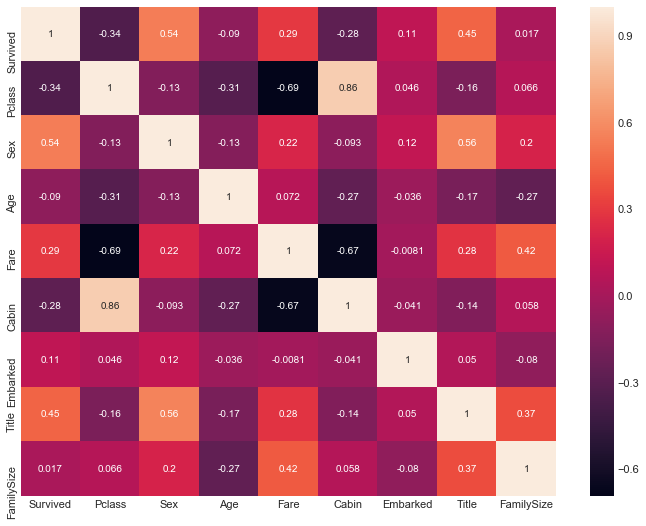

In [13]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot = True)

# 5) Model

In [14]:
# Adjusting training and test set for modeling
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]

In [15]:
X_test  = test.drop("PassengerId", axis=1).copy()

In [16]:
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [17]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=128,
                 kernel_initializer='normal', bias_initializer='zeros'))
model.add(Activation('relu'))

for i in range(0, 8):
    model.add(Dense(units=64, kernel_initializer='normal',
                     bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Dropout(.25))

model.add(Dense(units=1))
model.add(Activation('linear'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.fit(X_train.values, Y_train.values, epochs=600, verbose=2)

Epoch 1/600
 - 1s - loss: 1.3424 - acc: 0.6162
Epoch 2/600
 - 0s - loss: 0.6685 - acc: 0.6453
Epoch 3/600
 - 0s - loss: 0.6098 - acc: 0.7284
Epoch 4/600
 - 0s - loss: 0.5218 - acc: 0.7396
Epoch 5/600
 - 0s - loss: 0.5894 - acc: 0.7430
Epoch 6/600
 - 0s - loss: 0.5957 - acc: 0.7621
Epoch 7/600
 - 0s - loss: 0.4916 - acc: 0.7654
Epoch 8/600
 - 0s - loss: 0.6505 - acc: 0.7295
Epoch 9/600
 - 0s - loss: 0.6489 - acc: 0.7565
Epoch 10/600
 - 0s - loss: 0.5333 - acc: 0.7508
Epoch 11/600
 - 0s - loss: 0.4996 - acc: 0.7441
Epoch 12/600
 - 0s - loss: 0.5977 - acc: 0.7217
Epoch 13/600
 - 0s - loss: 0.6274 - acc: 0.6902
Epoch 14/600
 - 0s - loss: 0.6167 - acc: 0.6846
Epoch 15/600
 - 0s - loss: 0.5621 - acc: 0.7082
Epoch 16/600
 - 0s - loss: 0.6089 - acc: 0.7093
Epoch 17/600
 - 0s - loss: 0.7423 - acc: 0.6655
Epoch 18/600
 - 0s - loss: 0.6773 - acc: 0.6902
Epoch 19/600
 - 0s - loss: 0.6166 - acc: 0.7003
Epoch 20/600
 - 0s - loss: 0.5848 - acc: 0.6947
Epoch 21/600
 - 0s - loss: 0.5840 - acc: 0.6902
E

Epoch 171/600
 - 0s - loss: 0.5022 - acc: 0.6700
Epoch 172/600
 - 0s - loss: 0.5106 - acc: 0.6599
Epoch 173/600
 - 0s - loss: 0.5081 - acc: 0.6622
Epoch 174/600
 - 0s - loss: 0.5574 - acc: 0.6409
Epoch 175/600
 - 0s - loss: 0.4898 - acc: 0.6599
Epoch 176/600
 - 0s - loss: 0.4579 - acc: 0.6936
Epoch 177/600
 - 0s - loss: 0.4822 - acc: 0.6958
Epoch 178/600
 - 0s - loss: 0.5290 - acc: 0.6667
Epoch 179/600
 - 0s - loss: 0.4544 - acc: 0.6869
Epoch 180/600
 - 0s - loss: 0.4767 - acc: 0.6790
Epoch 181/600
 - 0s - loss: 0.4579 - acc: 0.7059
Epoch 182/600
 - 0s - loss: 0.4630 - acc: 0.6588
Epoch 183/600
 - 0s - loss: 0.5400 - acc: 0.6554
Epoch 184/600
 - 0s - loss: 0.5349 - acc: 0.6689
Epoch 185/600
 - 0s - loss: 0.4865 - acc: 0.7059
Epoch 186/600
 - 0s - loss: 0.4679 - acc: 0.7160
Epoch 187/600
 - 0s - loss: 0.4563 - acc: 0.7228
Epoch 188/600
 - 0s - loss: 0.4403 - acc: 0.7273
Epoch 189/600
 - 0s - loss: 0.4400 - acc: 0.7172
Epoch 190/600
 - 0s - loss: 0.4536 - acc: 0.7116
Epoch 191/600
 - 0s 

 - 0s - loss: 0.5697 - acc: 0.6453
Epoch 339/600
 - 0s - loss: 0.5405 - acc: 0.6611
Epoch 340/600
 - 0s - loss: 0.4744 - acc: 0.6723
Epoch 341/600
 - 0s - loss: 0.4530 - acc: 0.7127
Epoch 342/600
 - 0s - loss: 0.4588 - acc: 0.7262
Epoch 343/600
 - 0s - loss: 0.4369 - acc: 0.7262
Epoch 344/600
 - 0s - loss: 0.4553 - acc: 0.7127
Epoch 345/600
 - 0s - loss: 0.4645 - acc: 0.7048
Epoch 346/600
 - 0s - loss: 0.5313 - acc: 0.6947
Epoch 347/600
 - 0s - loss: 0.4683 - acc: 0.6970
Epoch 348/600
 - 0s - loss: 0.4632 - acc: 0.6992
Epoch 349/600
 - 0s - loss: 0.4561 - acc: 0.7048
Epoch 350/600
 - 0s - loss: 0.4507 - acc: 0.6947
Epoch 351/600
 - 0s - loss: 0.5842 - acc: 0.6745
Epoch 352/600
 - 0s - loss: 0.5629 - acc: 0.6768
Epoch 353/600
 - 0s - loss: 0.4607 - acc: 0.6936
Epoch 354/600
 - 0s - loss: 0.4541 - acc: 0.6914
Epoch 355/600
 - 0s - loss: 0.4934 - acc: 0.6880
Epoch 356/600
 - 0s - loss: 0.4701 - acc: 0.6958
Epoch 357/600
 - 0s - loss: 0.5016 - acc: 0.6981
Epoch 358/600
 - 0s - loss: 0.5031

Epoch 506/600
 - 0s - loss: 0.4835 - acc: 0.6902
Epoch 507/600
 - 0s - loss: 0.5551 - acc: 0.6678
Epoch 508/600
 - 0s - loss: 0.5430 - acc: 0.6712
Epoch 509/600
 - 0s - loss: 0.5143 - acc: 0.6869
Epoch 510/600
 - 0s - loss: 0.4858 - acc: 0.6914
Epoch 511/600
 - 0s - loss: 0.4795 - acc: 0.7059
Epoch 512/600
 - 0s - loss: 0.4504 - acc: 0.7071
Epoch 513/600
 - 0s - loss: 0.4513 - acc: 0.7183
Epoch 514/600
 - 0s - loss: 0.4586 - acc: 0.7250
Epoch 515/600
 - 0s - loss: 0.4391 - acc: 0.7093
Epoch 516/600
 - 0s - loss: 0.4563 - acc: 0.7262
Epoch 517/600
 - 0s - loss: 0.5104 - acc: 0.7262
Epoch 518/600
 - 0s - loss: 0.4752 - acc: 0.7194
Epoch 519/600
 - 0s - loss: 0.4447 - acc: 0.7205
Epoch 520/600
 - 0s - loss: 0.4195 - acc: 0.7239
Epoch 521/600
 - 0s - loss: 0.4624 - acc: 0.7172
Epoch 522/600
 - 0s - loss: 0.4600 - acc: 0.7104
Epoch 523/600
 - 0s - loss: 0.4730 - acc: 0.6846
Epoch 524/600
 - 0s - loss: 0.5172 - acc: 0.6981
Epoch 525/600
 - 0s - loss: 0.5152 - acc: 0.6880
Epoch 526/600
 - 0s 

**Final Results<br>**
- Accuracy: 72.5% ; Loss: 0.42

# 6) Model Prediction

In [20]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Title',
       'FamilySize'],
      dtype='object')

In [21]:
survived = model.predict_classes(X_test.values)

In [22]:
survived.shape

(418, 1)

# 7) Submission

In [23]:
submission = pd.DataFrame()
submission['PassengerId'] = test["PassengerId"]
submission['Survived'] = survived

In [24]:
submission.to_csv('submission.csv', index=False)